### Student Information
Name:林孟翰

Student ID:108061529

GitHub ID:108061529

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

### Begin Assignment Here
### Cells Needed For Lab Exercises

In [11]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Get a copy of the original X dataframe for later excercise
X_copy = X.copy()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Lab1 Exercises
###  **>>>Exercise 2:**
Experiment with other querying techniques using pandas dataframes.

In [12]:
#Access Index directly as an attribute, query every 10th record, showing first ten
X.text[::10][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

In [13]:
#Access via loc and label slices
X.loc[::10,'text':'category_name'][0:10]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2   
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian  
50           comp.graphics  
60             alt.atheism  
70  soc.religion.christian  
80                 sci.med  
90             alt.atheism

In [14]:
#Access scalar value with iat
X.iat[0,0]

'From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. '

###  **>>>Exercise 5:**

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.

$Hint$ :  why `.isnull()` didn't work?

In [15]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [16]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [17]:
# Answer here
# isnull(): indictates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike)
NA_df['missing_example']

0     NaN
1     NaN
2     NaN
3    None
4    None
5        
Name: missing_example, dtype: object

isnull() indicates None or NaN in array-like objects.

For A, the value is NaN, which will be captured by isnull()

For B, the value is missing, which will be captured by isnull()

For C and D, the values are the strings "NaN" and "None", they are not missing, so they won't be captured by isnull()

For E, None is captured by isnull(), according to the documentation

For F, the value is the empty string '', it is not missing, so it won't be captured by isnull()

### Cells Needed For Lab Exercises 6, 8

In [18]:
# Duplicate Operations
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
X = X.append(dummy_duplicate_dict, ignore_index=True)
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

# Sampling Operations
X_sample = X.sample(n=1000) #random state

###  **>>>Exercise 6:**

Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [19]:
# Answer here
X.equals(X_copy)

True

According to the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.equals.html, equals() allows two Series or DataFrames to be compared against each other to see if they have the same shape and elements.
X_copy is the copy of the dataframe X before all operations. "True" means all elements are the same in both objects.

###  **>>>Exercise 8:**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![alt txt](https://i.imgur.com/9eO431H.png)

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

soc.religion.christian    278
sci.med                   266
comp.graphics             250
alt.atheism               206
Name: category_name, dtype: int64

Index(['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'], dtype='object')


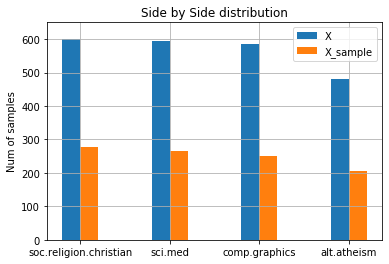

In [20]:
# Answer Here
import matplotlib.pyplot as plt
%matplotlib inline

# the distribution of the data
distribution_X = X.category_name.value_counts()
distribution_sample = X_sample.category_name.value_counts()
print(distribution_X)
print("")
print(distribution_sample)
print("")

# Get the categories(labels for X axis)
X_label = X.category_name.value_counts().index
print(X_label)

# Plot the figure
plt.figure()  
index = np.arange(0,len(X_label)) # for positioning the bars
bar_width = 0.2                   # set the width of the bars

# Bar plot for Distribution of X
A = plt.bar(index+0.9,
           distribution_X, 
           bar_width,
           alpha=1,
           label="X")              # Legend
# Bar plot for Distribution of X_sample
B = plt.bar(index+1.1,
            distribution_sample,
            bar_width,
            alpha=1,
            label="X_sample")      # Legend
plt.ylabel("Num of samples")
plt.xticks(index+1, list(X_label)) # Labels at X axis
plt.title('Side by Side distribution')
plt.legend()                       # Show legend on the plot
plt.ylim(0,650)
plt.grid(True)                     # Plot grid, better for visualization
plt.show()

### Cells Needed For Lab Exercises 10

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**

We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [22]:
# Answer here
import numpy as np
feat_names = count_vect.get_feature_names()[0:100]      # Get names for first 100 features
idx = np.where(X_counts[4, 0:100].toarray()[0] == 1)[0] # Get indices of the term that occurs in the document
print("Indexes of 1s: ", idx)
print("The term is: ",feat_names[idx[1]])               # Get the term and print

Indexes of 1s:  [ 0 37]
The term is:  01


### Cells Needed For Lab Exercises 11

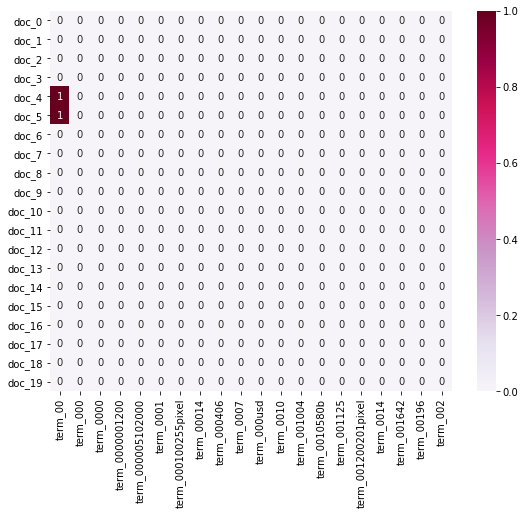

In [23]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization


#### Ans:
It would take a lot of time to plot all terms and docs with seaborn heatmap because it only takes normal arrays as input. To plot the complete heatmap efficiently, we can use spy() from matplotlib to work with sparse matrix, hence speeding up the plotting process.

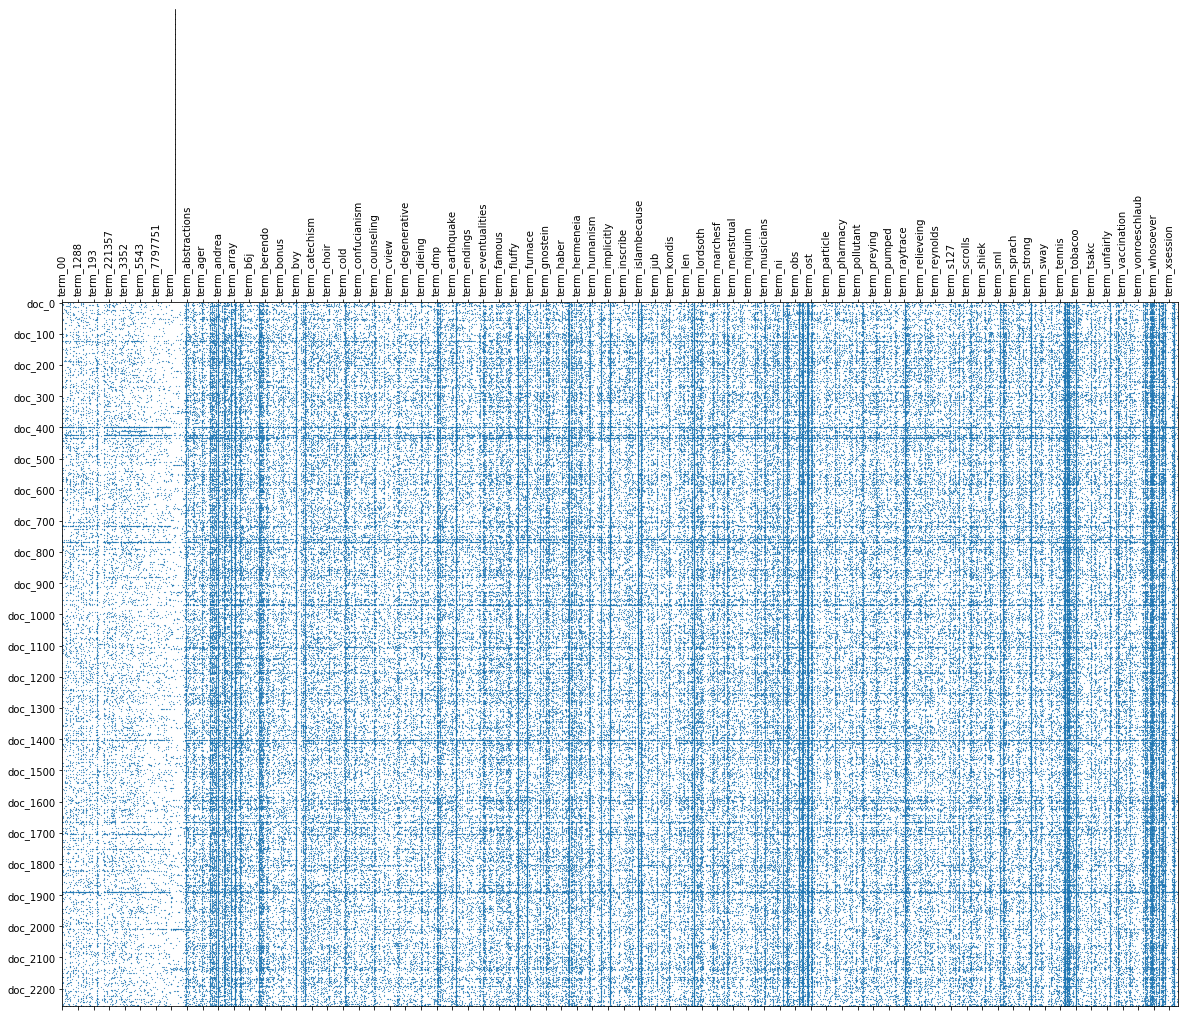

In [24]:
# Answer here
%matplotlib inline
feat_names_all = count_vect.get_feature_names()
feat_names_all = ["term_"+str(i) for i in feat_names_all]
docs_all = ["doc_"+ str(i) for i in list(X.index)]
plt.figure(figsize=(20, 20))                                                # specify size
plt.spy(X_counts,markersize=0.2,aspect=10.0)                                # plot sparse matrix directly
locsX = np.arange(0,X_counts.shape[1],500)                                  # locations where you want to show term
locsY = np.arange(0,len(X.index),100)                                       # locations where you want to show doc
plt.xticks(locsX, np.array(feat_names_all)[locsX.astype(int)],rotation=90)  # show terms on x axis
plt.yticks(locsY, np.array(docs_all)[locsY.astype(int)])                    # show terms on y axis
plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


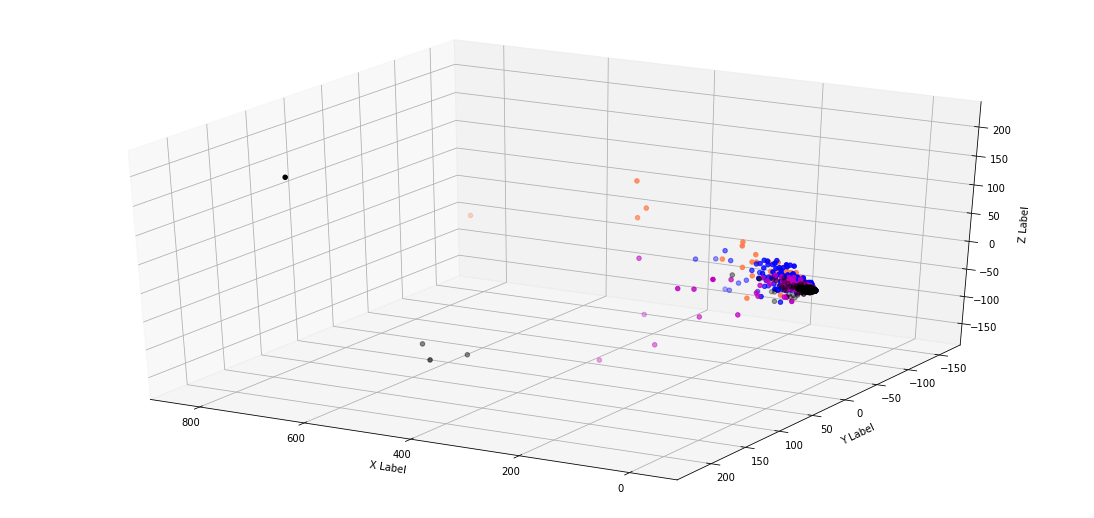

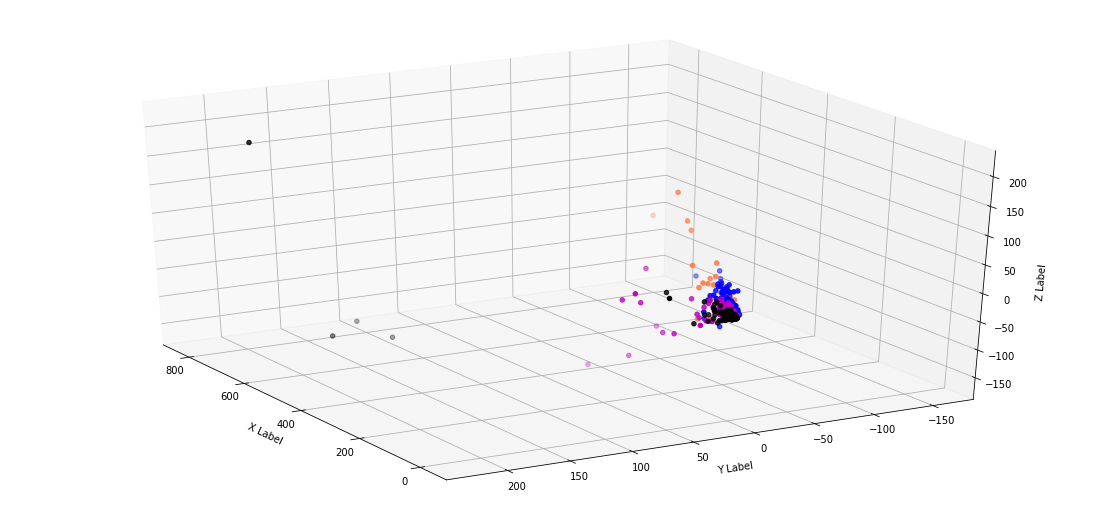

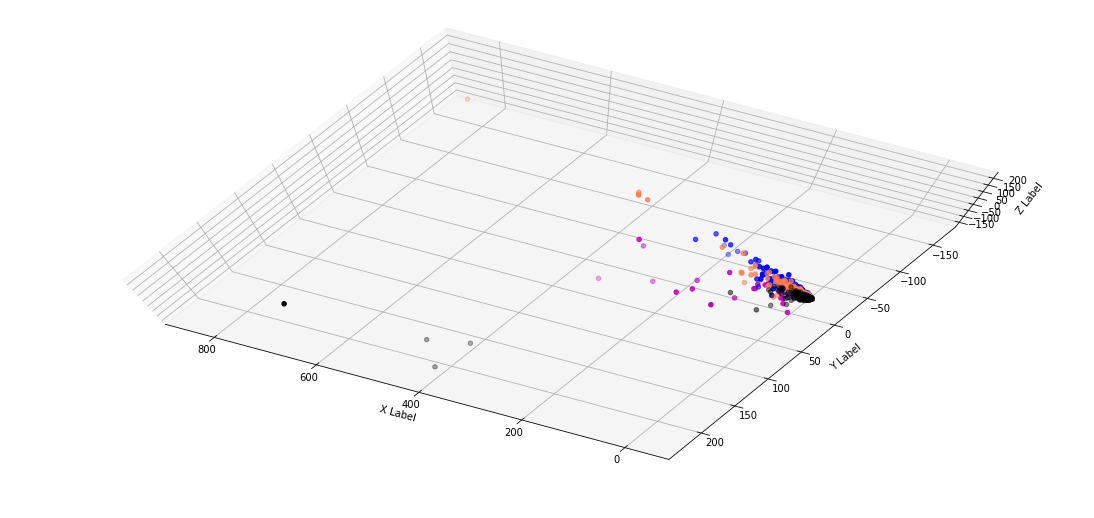

In [25]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

# function to plot 3d-plot
def plot_3d(X_reduced, a, b, categories):                        # a: elevation, b: azimuth
    col = ['coral', 'blue', 'black', 'm']

    # plot
    fig = plt.figure(figsize = (15,7))
    ax = Axes3D(fig)

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category,0]         # x location
        ys = X_reduced[X['category_name'] == category,1]         # y location
        zs = X_reduced[X['category_name'] == category,2]         # z location
   
        ax.scatter(xs, ys, zs, c=c, marker='o')                  # scatter plot for each category

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(a,b)                                            # set camera position
    plt.show()
    return ax
    
angles=[[30,120], [30,150], [80,120]]                            # give different angles
for ang in angles:
    ax = plot_3d(X_reduced, ang[0], ang[1], categories)

### Cells needed for Exercise 13

In [26]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies=np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [29]:
# Answer here
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)   
fig = go.Figure(                                              # plotly gragh object
    data=[go.Bar(y=term_frequencies)],
    layout_title_text="Term Frequency"
)
fig.update_yaxes(range=[0,400])
fig.update_xaxes(range=[-0.5, 100.5],                         # show first 100, move plot to see the rest
                 tickangle=270,
                 ticktext=count_vect.get_feature_names(),
                 tickvals=np.arange(0,len(term_frequencies),1),
                 tickfont=dict(family='serif', color='black', size=10))                             
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?